# Using RNNs for Image Classification on the MNIST Dataset

The best thing I've learned as I've studied deep learning is that machine learning is experimentation, not philosophy (thanks PACKT!). When we study different ML and DL models for disparate tasks, one question always arises: why can't I just use one model for another task? In this experiment, we explore using the Long Short-Term Model for image classification on the handwritten digits dataset - the MNIST dataset. Maybe in a future experiment, I could explore if we can use CNNs for sequence data...

## Load the Data

As always, the first step is to load the data and study its structure.

In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step 


In [30]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (60000, 28, 28), X_test shape: (10000, 28, 28)


We have 70,000 images in our dataset, 60,000 of which we'll use for training. Let's see a typical sample in our dataset.

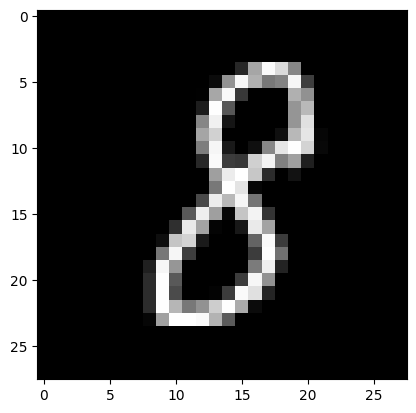

In [61]:
num = np.random.randint(0, 60000)
plt.imshow(X_train[num], cmap='gray')

Let's also see how many classes we have.

In [32]:
classes = np.unique(y_train).size
print(classes)

10


## Build and Train the Model

A simple neural network with a single LSTM layer.

In [33]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from sklearn.model_selection import train_test_split

random_state = 7

# Build

i = Input(shape=X_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

# Compile and Train

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.1,
                                                  random_state=random_state)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=15)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8202 - loss: 0.5327 - val_accuracy: 0.8678 - val_loss: 0.3754
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8938 - loss: 0.3129 - val_accuracy: 0.8917 - val_loss: 0.3125
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9105 - loss: 0.2647 - val_accuracy: 0.9103 - val_loss: 0.2627
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9235 - loss: 0.2294 - val_accuracy: 0.9107 - val_loss: 0.2584
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9296 - loss: 0.2106 - val_accuracy: 0.9158 - val_loss: 0.2507
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9342 - loss: 0.1950 - val_accuracy: 0.9203 - val_loss: 0.2363
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9404 - loss: 0.1789 - val_accuracy: 0.9242 - val_loss: 0.2174
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9402 -

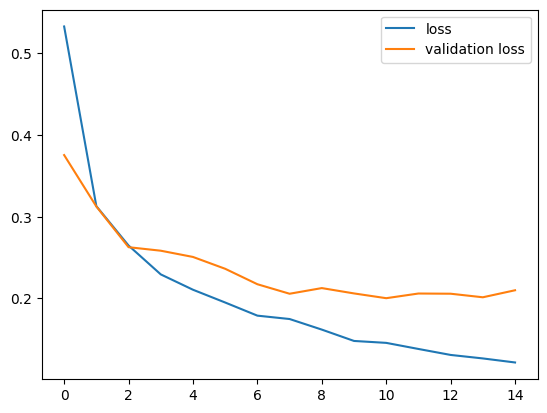

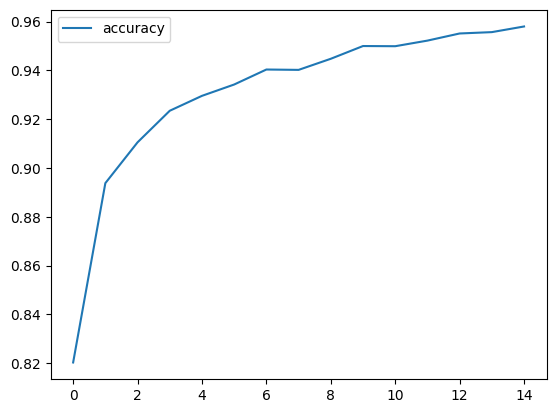

In [35]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

## Evaluate the Model

Now, we make predictions using our model and evaluate its performance.

In [40]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_classes = np.argmax(y_pred, axis=1)
print(f"Classification Report")
print(classification_report(y_test, y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.99      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.93      0.91      0.92      1010
           4       0.96      0.90      0.93       982
           5       0.92      0.91      0.92       892
           6       0.94      0.98      0.96       958
           7       0.92      0.93      0.93      1028
           8       0.95      0.91      0.93       974
           9       0.88      0.91      0.89      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



It is interesting to see that some numbers are more accurately classified than others. For example, the digit `1` is the most reliably recognized, achieving the highest precision and recall, while digit `9` is the most challenging for the model, reflected in its lower precision and F1-score. Let's plot the confusion matrix for our results to better understand which pairs of numbers are most often misclassified. 

Text(70.72222222222221, 0.5, 'Actual Digits')

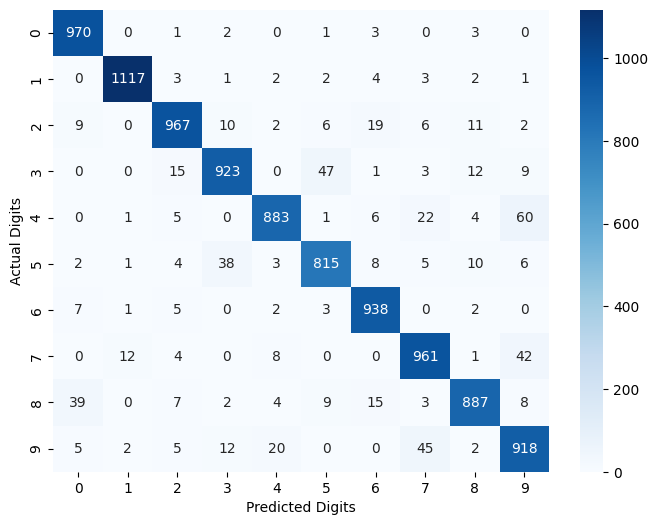

In [59]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d')
plt.xlabel("Predicted Digits")
plt.ylabel("Actual Digits")


The confusion matrix further underscores the model’s overall effectiveness, with the majority of predictions falling along the diagonal, indicating most digits are correctly identified. Consistent with earlier findings, digit 1 stands out for its high accuracy, with almost all test samples correctly classified. Digits 0, 6, and 7 also achieve strong performance, showing minimal confusion with other digits. On the other hand, digit 9 is frequently misclassified, particularly as 4 or 7. Misclassifications are also notable for digit 5, often predicted as 3 or 8, and for digit 8, which is sometimes mistaken for 0 or 3. These patterns highlight that while the model is generally reliable, digits 5, 8, and 9 remain comparatively challenging and account for a substantial portion of the misclassifications.

Let's see some of the misclassified samples.

Text(0.5, 1.0, 'Actual Digit: 7, Predicted: 9')

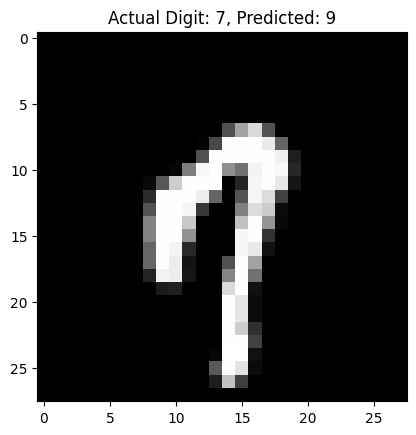

In [66]:
misclassified_idx = np.where(y_pred_classes != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f"Actual Digit: {y_test[i]}, Predicted: {y_pred_classes[i]}")

## Conclusion

This notebook explores the use of recurrent neural networks for image classification on the MNIST dataset. The model demonstrates solid overall accuracy, particularly excelling on digits like 1, 0, 6, and 7, while misclassifications remain most frequent for 5, 8, and 9. These results point to the strengths of the RNN-based approach, but also make it clear that certain digits present consistent challenges for this architecture. CNN is the better choice for sure then!